This project explores a mock dataset of stars, constellations, galaxies, and users. It demonstrates how I approach data analysis: cleaning, descriptive stats, inferential tests, and visualization — even in a science-inspired domain. Unlike my other projects, this project is focused on **statistics and analytical depth**.

This notebook is focused on **inferential statistics**.  It builds on the **descriptive statistics** exploration.  Here, we move from simply describing the astronomy dataset (stars, constellations, galaxies) to actually **testing hypotheses**.

User behavior analysis is deferred to notebook 5.


***Disclaimer:***

*This dataset is intentionally kept small so the notebook runs quickly and remains easy to review.  Because of that, the folowing statistical tests may not yield strong or intuitive results.  The purpose here is to **demonstrate the workflow** of applying inferential statistics — setting up hypotheses, running tests, and interpreting outputs.  With larger, real-world datasets, the same methods would provide more robust insights, but for this mock project, clarity and reproducibility were the priority.*

First, import the necessary libraries and load the CSVs into dataframes.  Note that the CSVs that have already been cleaned up by `01_raw_data_cleanup.ipynb` are loaded.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

SOURCE_FOLDER = "../data/cleaned"
sns.set_theme(style="whitegrid", palette="deep")

df_stars = pd.read_csv(f"{SOURCE_FOLDER}/stars.csv")
df_constellations = pd.read_csv(f"{SOURCE_FOLDER}/constellations.csv")
df_galaxies = pd.read_csv(f"{SOURCE_FOLDER}/galaxies.csv")

Question: **Do certain star types tend to be brighter than others?**

We'll use **ANOVA** to compare average brightness across star types.

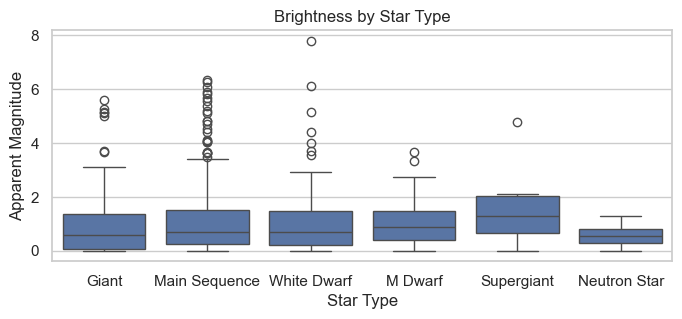

ANOVA – Brightness by Star Type: F_onewayResult(statistic=np.float64(0.617366635512804), pvalue=np.float64(0.6866429468681525))


In [33]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=df_stars, x="star_type", y="apparent_magnitude")
plt.title("Brightness by Star Type")
plt.xlabel("Star Type")
plt.ylabel("Apparent Magnitude")
plt.show()

anova_star_type = stats.f_oneway(
    *[group["apparent_magnitude"].values for _, group in df_stars.groupby("star_type")]
)
print("ANOVA – Brightness by Star Type:", anova_star_type)

**Interpretation:**
- The boxplot shows how brightness varies across star types.
- The ANOVA test checks if those differences are statistically significant.
- A low p-value (< 0.05) means at least one star type differs in brightness.

Question: **Do galaxies of different types host different numbers of constellations?**

We'll aggregate constellations per galaxy and compare across galaxy types.

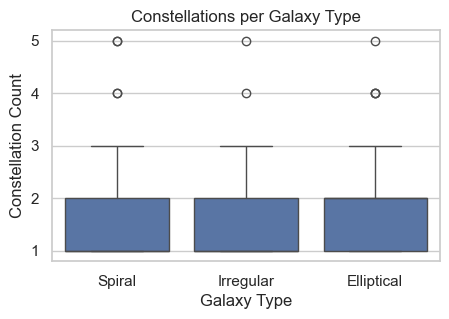

ANOVA – Constellations by Galaxy Type: F_onewayResult(statistic=np.float64(1.7278138714891504), pvalue=np.float64(0.1798658977328941))


In [34]:
consts_per_gal = df_constellations.groupby("galaxy_id").size().reset_index(name="const_count")
consts_with_type = consts_per_gal.merge(df_galaxies[["galaxy_id", "galaxy_type"]], on="galaxy_id")

plt.figure(figsize=(5, 3))
sns.boxplot(data=consts_with_type, x="galaxy_type", y="const_count")
plt.title("Constellations per Galaxy Type")
plt.xlabel("Galaxy Type")
plt.ylabel("Constellation Count")
plt.show()

anova_galaxy_type = stats.f_oneway(
    *[group["const_count"].values for name, group in consts_with_type.groupby("galaxy_type")]
)
print("ANOVA – Constellations by Galaxy Type:", anova_galaxy_type)


**Interpretation:**
- This analysis tests whether Spiral, Elliptical, and Irregular galaxies
differ in how many constellations they host.
- Again, a low p-value suggests a real difference between galaxy types.

Question: **Are star type and spectral type independent?**

We'll use a **Chi-square test of independence** on the contingency table.

Chi-square test: 56.42222732716489 p-value: 0.11821470322924406


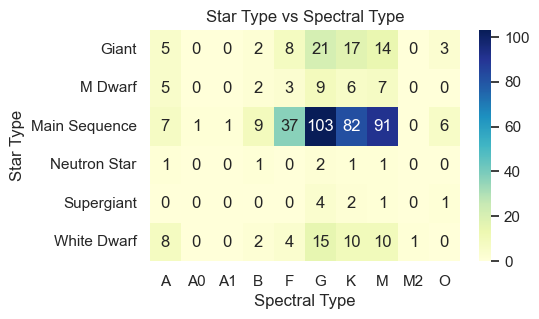

In [35]:
contingency = pd.crosstab(df_stars["star_type"], df_stars["spectral_type"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print("Chi-square test:", chi2, "p-value:", p)

plt.figure(figsize=(5, 3))
sns.heatmap(contingency, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Star Type vs Spectral Type")
plt.ylabel("Star Type")
plt.xlabel("Spectral Type")
plt.show()


**Interpretation:**
- The heatmap shows counts of stars by type and spectral class.
- The Chi-square test tells us if the two variables are independent.
- A low p-value suggests certain star types are associated with specific spectral types.

Question: **Are brighter stars hotter or closer?**

We'll compute both Pearson and Spearman correlations.

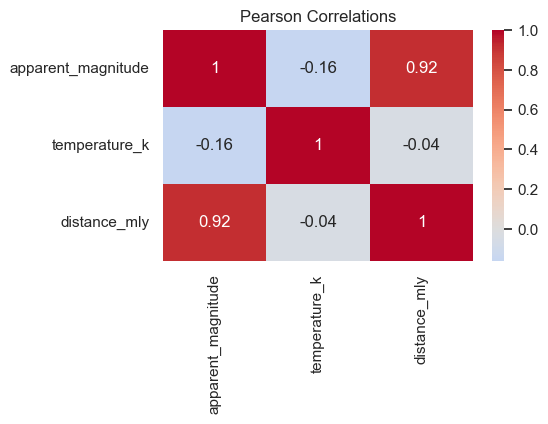

Spearman Correlation Matrix:
                     apparent_magnitude  temperature_k  distance_mly
apparent_magnitude            1.000000      -0.153610      0.712531
temperature_k                -0.153610       1.000000      0.024398
distance_mly                  0.712531       0.024398      1.000000


In [36]:
num_vars = df_stars[["apparent_magnitude", "temperature_k", "distance_mly"]]
corr_matrix = num_vars.corr(method="pearson")

plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson Correlations")
plt.show()

# Spearman (rank-based, less sensitive to skew/outliers)
spearman_corr = num_vars.corr(method="spearman")
print("Spearman Correlation Matrix:\n", spearman_corr)

**Interpretation:**
- Negative correlation with brightness means lower apparent magnitude (brighter stars)
tend to be hotter or closer.
- Pearson shows linear relationships; Spearman captures monotonic trends.

Question: **Can we model brightness based on temperature and distance?**

We'll run a simple linear regression using Seaborn's `lmplot`.

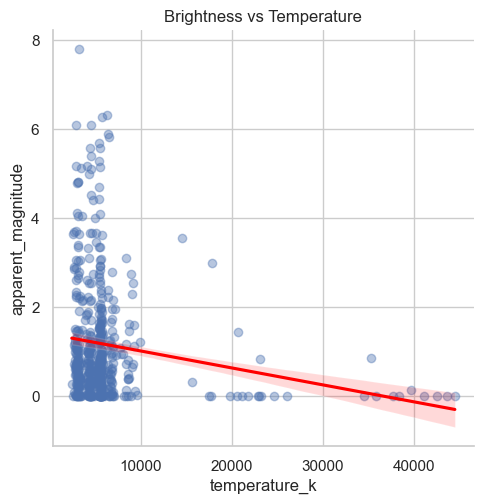

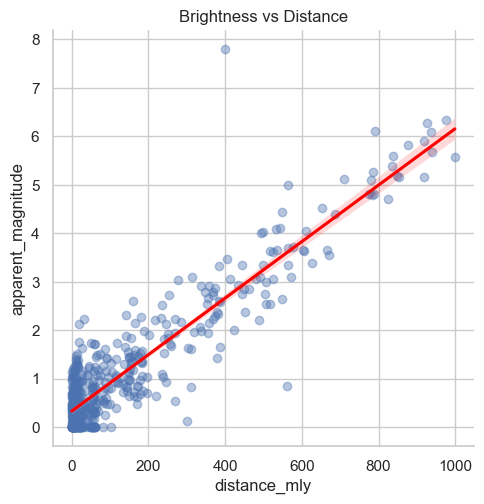

In [37]:
sns.lmplot(
    data=df_stars,
    x="temperature_k",
    y="apparent_magnitude",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"}
)
plt.title("Brightness vs Temperature")
plt.show()

sns.lmplot(
    data=df_stars,
    x="distance_mly",
    y="apparent_magnitude",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"}
)
plt.title("Brightness vs Distance")
plt.show()

**Interpretation:**
- These regressions are not meant as astrophysical models,
  but as a demonstration of applying regression to test relationships.
- They show how apparent magnitude shifts with distance and temperature.
- For this dataset, we expect brighter stars to be nearer and hotter.

### Summary

In this notebook, we applied inferential statistics to the astronomy dataset:
- ANOVA showed whether brightness differs across star types.
- Another ANOVA tested if galaxy type influences constellation richness.
- Chi-square tested independence of star type and spectral type.
- Correlation and regression quantified how brightness relates to distance and temperature.

These tests extend the descriptive work and demonstrate how to move from
**“what the data looks like”** to **“what we can infer about relationships.”**